<a href="https://colab.research.google.com/github/NimsW20/TensorFlow-Tutorial/blob/main/Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [11]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip

# Define paths
PATH = 'cats_and_dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Print paths and contents
print("Train Directory:", train_dir)
print("Validation Directory:", validation_dir)
print("Test Directory:", test_dir)

print("Train Directory Contents:", os.listdir(train_dir))
print("Validation Directory Contents:", os.listdir(validation_dir))
print("Test Directory Contents:", os.listdir(test_dir))

# Get number of files in each directory
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print(f"Total training images: {total_train}")
print(f"Total validation images: {total_val}")
print(f"Total test images: {total_test}")

IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 128
epochs = 15

Train Directory: cats_and_dogs/train
Validation Directory: cats_and_dogs/validation
Test Directory: cats_and_dogs/test
Train Directory Contents: ['dogs', '.DS_Store', 'cats']
Validation Directory Contents: ['dogs', '.DS_Store', 'cats']
Test Directory Contents: ['7.jpg', '40.jpg', '8.jpg', '47.jpg', '48.jpg', '14.jpg', '45.jpg', '23.jpg', '44.jpg', '42.jpg', '36.jpg', '31.jpg', '12.jpg', '17.jpg', '27.jpg', '41.jpg', '6.jpg', '50.jpg', '49.jpg', '4.jpg', '19.jpg', '22.jpg', '5.jpg', '30.jpg', '9.jpg', '43.jpg', '28.jpg', '35.jpg', '29.jpg', '13.jpg', '25.jpg', '46.jpg', '2.jpg', '32.jpg', '1.jpg', '18.jpg', '10.jpg', '20.jpg', '33.jpg', '26.jpg', '37.jpg', '3.jpg', '38.jpg', '15.jpg', '11.jpg', '16.jpg', '24.jpg', '.DS_Store', '21.jpg', '39.jpg', '34.jpg']
Total training images: 2001
Total validation images: 1001
Total test images: 51


In [12]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                     class_mode='binary', shuffle=True)
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory=validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                     class_mode='binary', shuffle=True)
#test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, directory=test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                    # class_mode=None, shuffle=False, follow_links=False)
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=PATH, classes=['test'],
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="input", shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


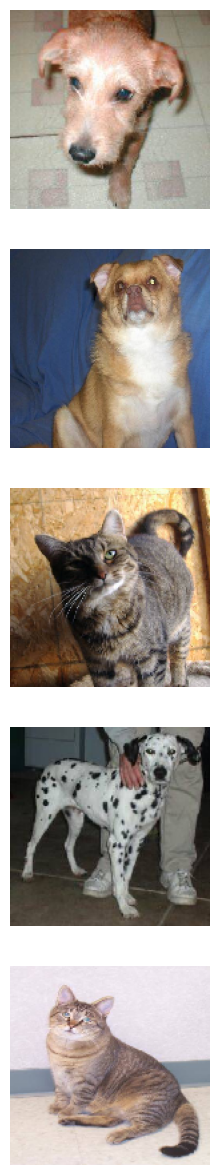

In [13]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [14]:
# 5
train_image_generator = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,
                                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rescale=1./255,
                                            fill_mode='nearest')


Found 2000 images belonging to 2 classes.


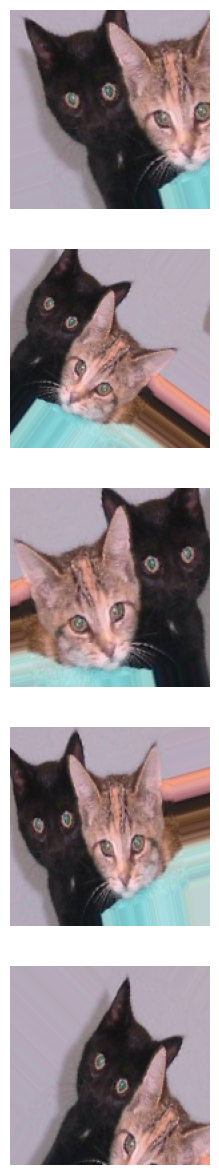

In [15]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [16]:
# 7
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [17]:
# 8
history = model.fit(train_data_gen, epochs=epochs, steps_per_epoch=(train_data_gen.samples//batch_size),
                    validation_data=val_data_gen, validation_steps= (val_data_gen.samples// batch_size))

Epoch 1/15
15/15 [==============================] - 23s 979ms/step - loss: 0.9974 - accuracy: 0.5037 - val_loss: 0.7097 - val_accuracy: 0.4989
Epoch 2/15
15/15 [==============================] - 14s 971ms/step - loss: 0.6924 - accuracy: 0.5069 - val_loss: 0.6932 - val_accuracy: 0.4944
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.6972 - accuracy: 0.5214 - val_loss: 0.6938 - val_accuracy: 0.5011
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.6925 - accuracy: 0.5150 - val_loss: 0.6913 - val_accuracy: 0.5056
Epoch 5/15
15/15 [==============================] - 14s 972ms/step - loss: 0.6931 - accuracy: 0.5112 - val_loss: 0.6905 - val_accuracy: 0.5112
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6924 - accuracy: 0.5031 - val_loss: 0.6915 - val_accuracy: 0.5134
Epoch 7/15
15/15 [==============================] - 15s 1s/step - loss: 0.6907 - accuracy: 0.5443 - val_loss: 0.6863 - val_accuracy: 0.5179
Epoch 8/15


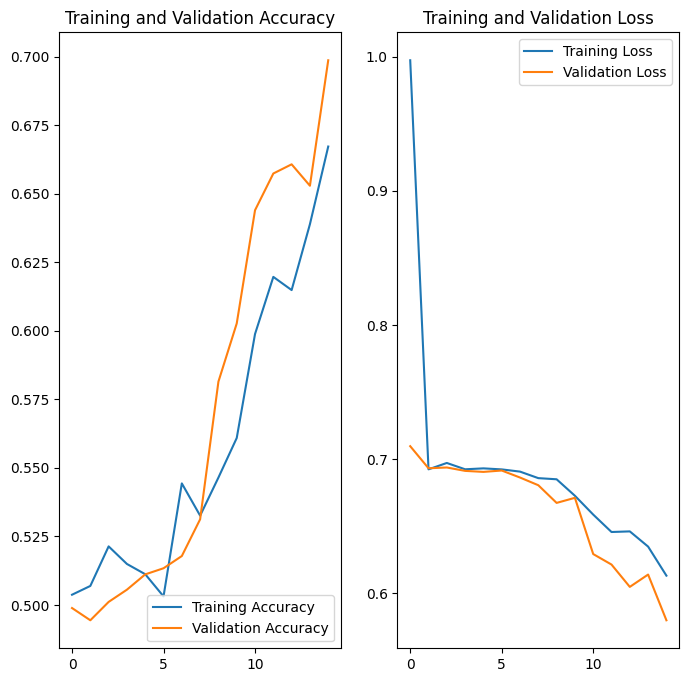

In [18]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#10

probabilities = model.predict(test_data_gen)
probabilities = np.squeeze(probabilities)
probabilities = [1 if x >= 0.5 else 0 for x in probabilities]
plotImages([test_data_gen[0][0][i] for i in range(5)], probabilities)

1/1 [==============================] - 0s 125ms/step


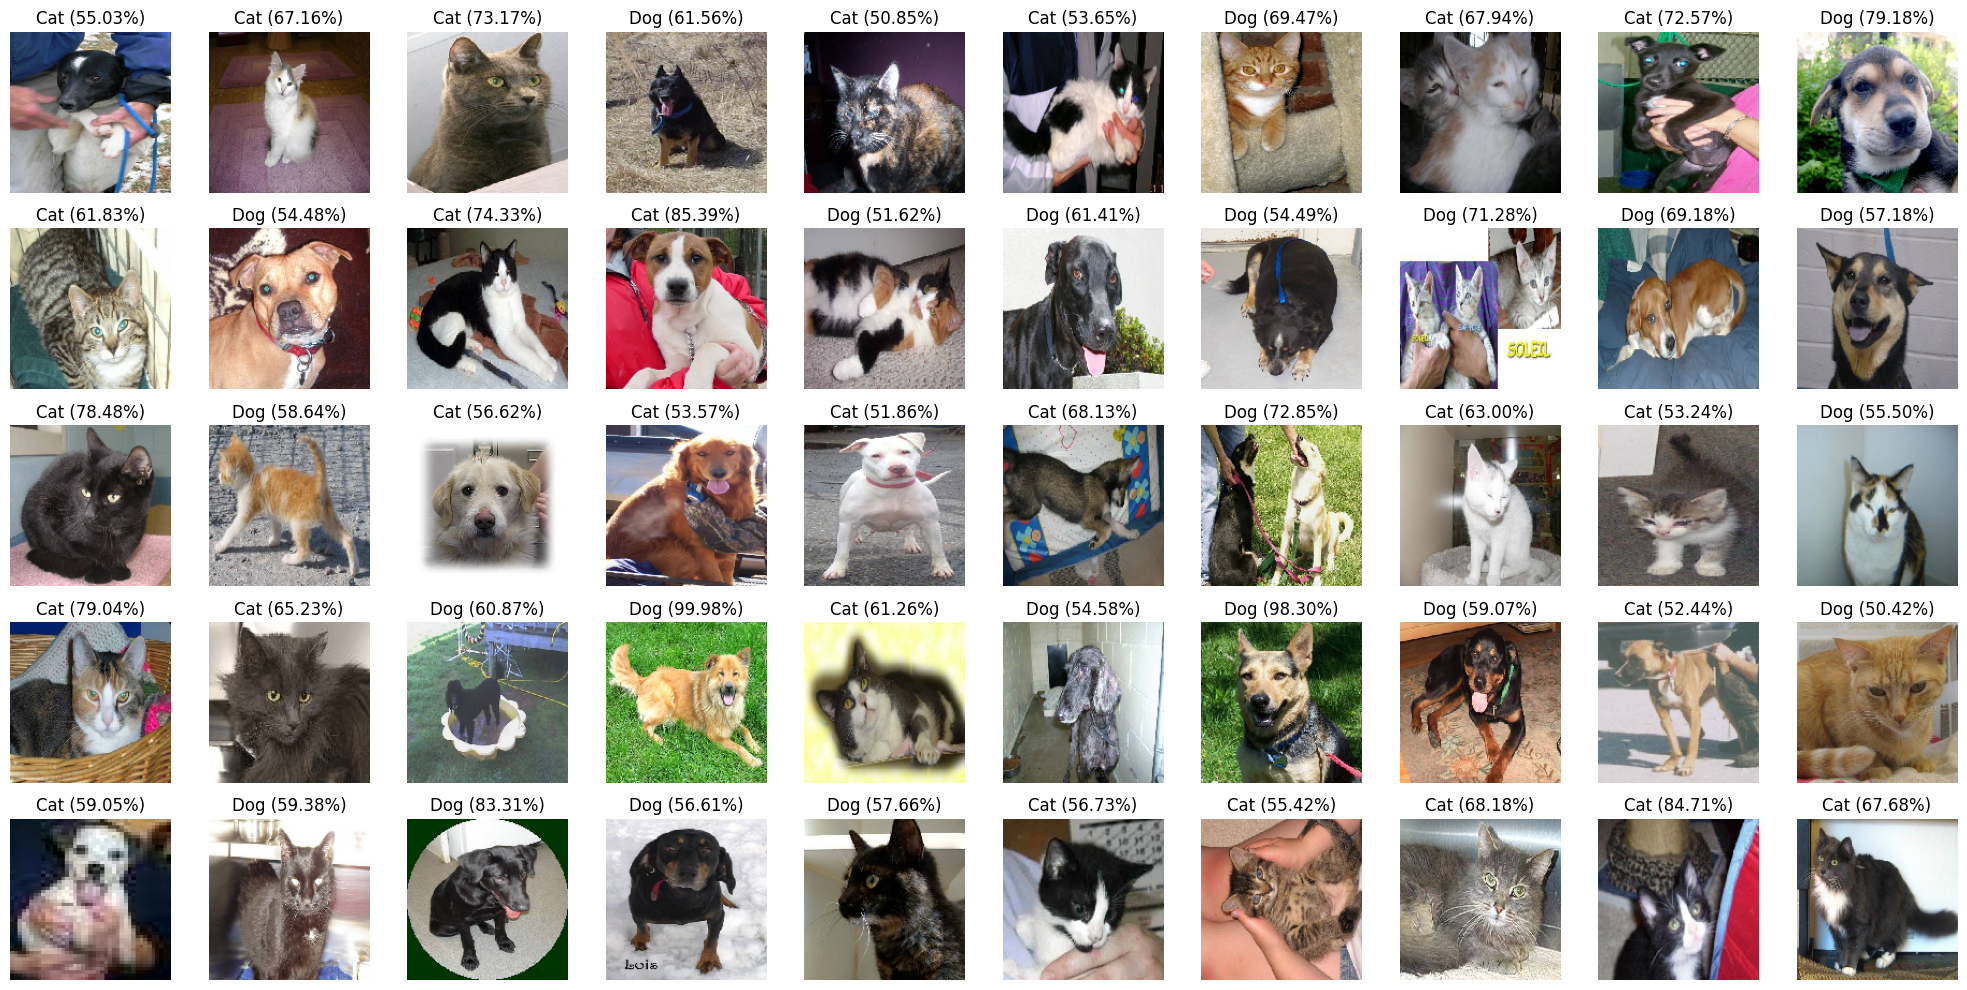

In [20]:
# Predict the probabilities for the test images
probabilities = model.predict(test_data_gen)

# Convert probabilities to binary labels (0 for Cat, 1 for Dog)
predicted_classes = np.where(probabilities > 0.5, 1, 0)

# Function to plot images with their predicted labels
def plotImages(images_arr, probabilities):
    fig, axes = plt.subplots(5, 10, figsize=(20, 10))
    axes = axes.flatten()
    for img, ax, prob in zip(images_arr, axes, probabilities):
        ax.imshow(img)
        if prob > 0.5:
            label = f"Dog ({prob[0] * 100:.2f}%)"
        else:
            label = f"Cat ({(1 - prob[0]) * 100:.2f}%)"
        ax.set_title(label, fontsize=12)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get the images from the test data generator
test_images = []
for _ in range(len(test_data_gen)):
    imgs, _ = next(test_data_gen)
    test_images.extend(imgs)

# Ensure the number of images matches the number of predictions
test_images = np.array(test_images)
if len(test_images) > len(probabilities):
    test_images = test_images[:len(probabilities)]

# Plot the images with their predicted labels
plotImages(test_images, probabilities)


In [22]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
